In [2]:
print('hi')

hi


In [3]:
!pip install matplotlib pandas psycopg2 --quiet


/var/folders/5s/msqhxw9x46gfs6_9m2x8qxch0000gn/T/ipykernel_93746/1249448013.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  token_df = pd.read_sql("SELECT DISTINCT token FROM sma_signals", conn)
/var/folders/5s/msqhxw9x46gfs6_9m2x8qxch0000gn/T/ipykernel_93746/1249448013.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  sma_df = pd.read_sql(f"""
/var/folders/5s/msqhxw9x46gfs6_9m2x8qxch0000gn/T/ipykernel_93746/1249448013.py:33: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  close_df = pd.read_sql(f"""
/var/folders/5s/m

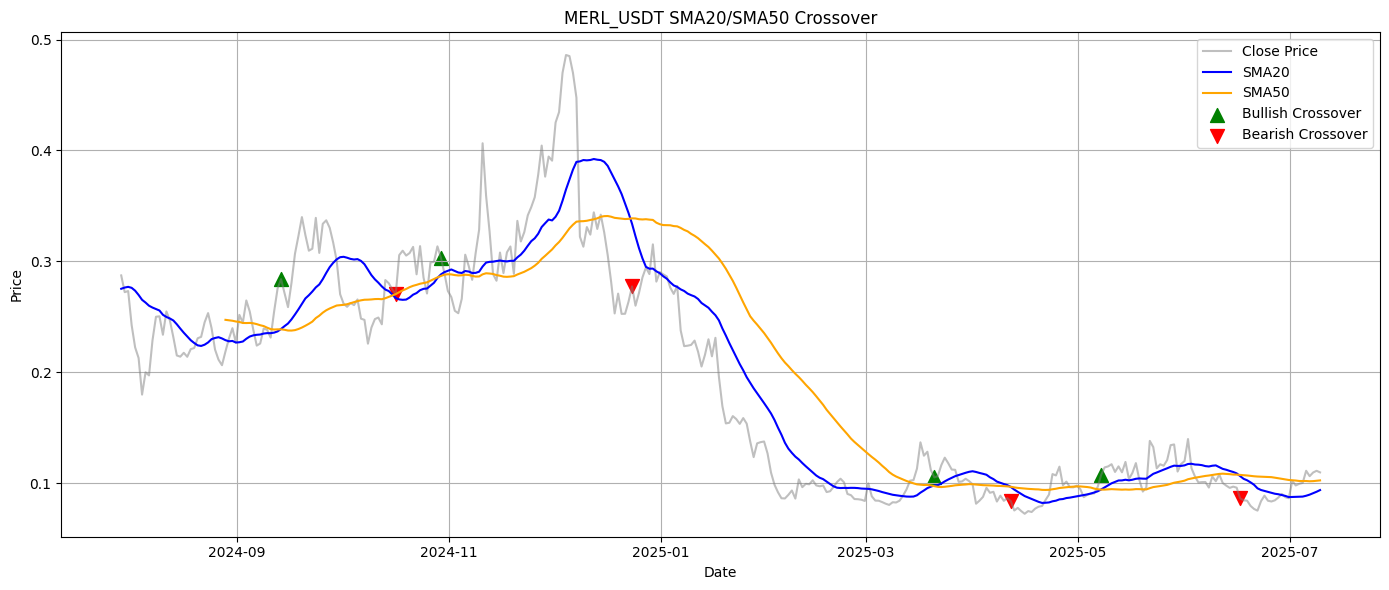

/var/folders/5s/msqhxw9x46gfs6_9m2x8qxch0000gn/T/ipykernel_93746/1249448013.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  sma_df = pd.read_sql(f"""
/var/folders/5s/msqhxw9x46gfs6_9m2x8qxch0000gn/T/ipykernel_93746/1249448013.py:33: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  close_df = pd.read_sql(f"""
/var/folders/5s/msqhxw9x46gfs6_9m2x8qxch0000gn/T/ipykernel_93746/1249448013.py:43: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  signal_df = pd.read_sql(f"""


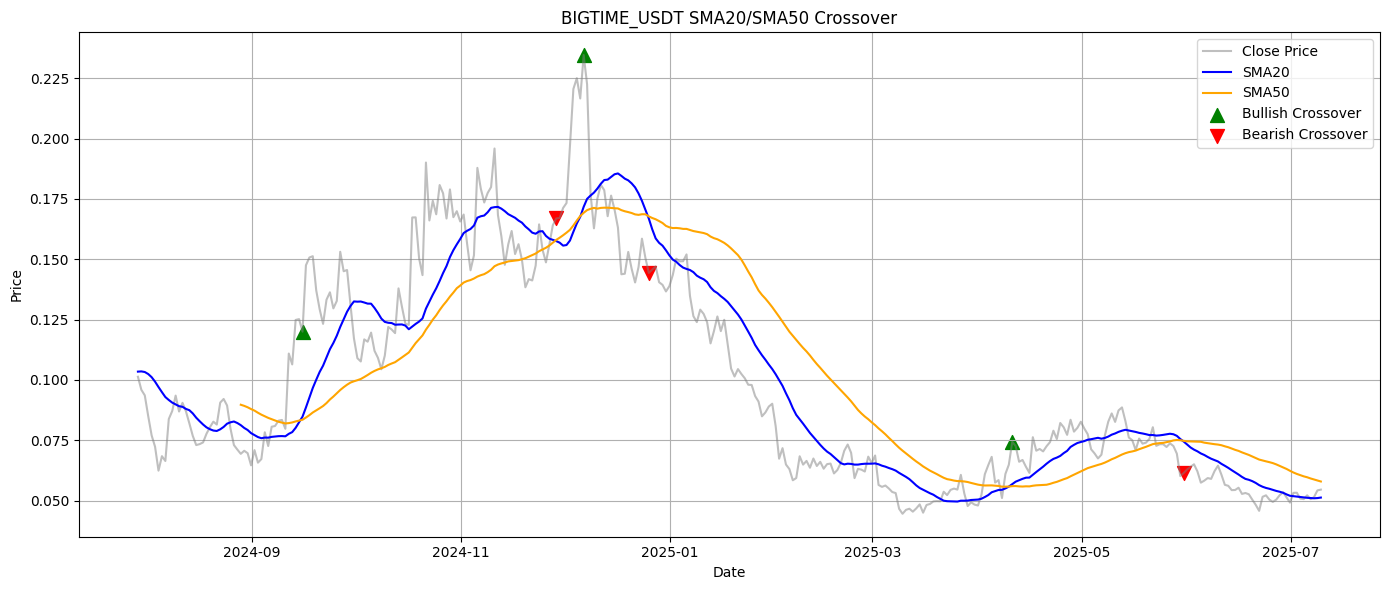

/var/folders/5s/msqhxw9x46gfs6_9m2x8qxch0000gn/T/ipykernel_93746/1249448013.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  sma_df = pd.read_sql(f"""
/var/folders/5s/msqhxw9x46gfs6_9m2x8qxch0000gn/T/ipykernel_93746/1249448013.py:33: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  close_df = pd.read_sql(f"""
/var/folders/5s/msqhxw9x46gfs6_9m2x8qxch0000gn/T/ipykernel_93746/1249448013.py:43: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  signal_df = pd.read_sql(f"""


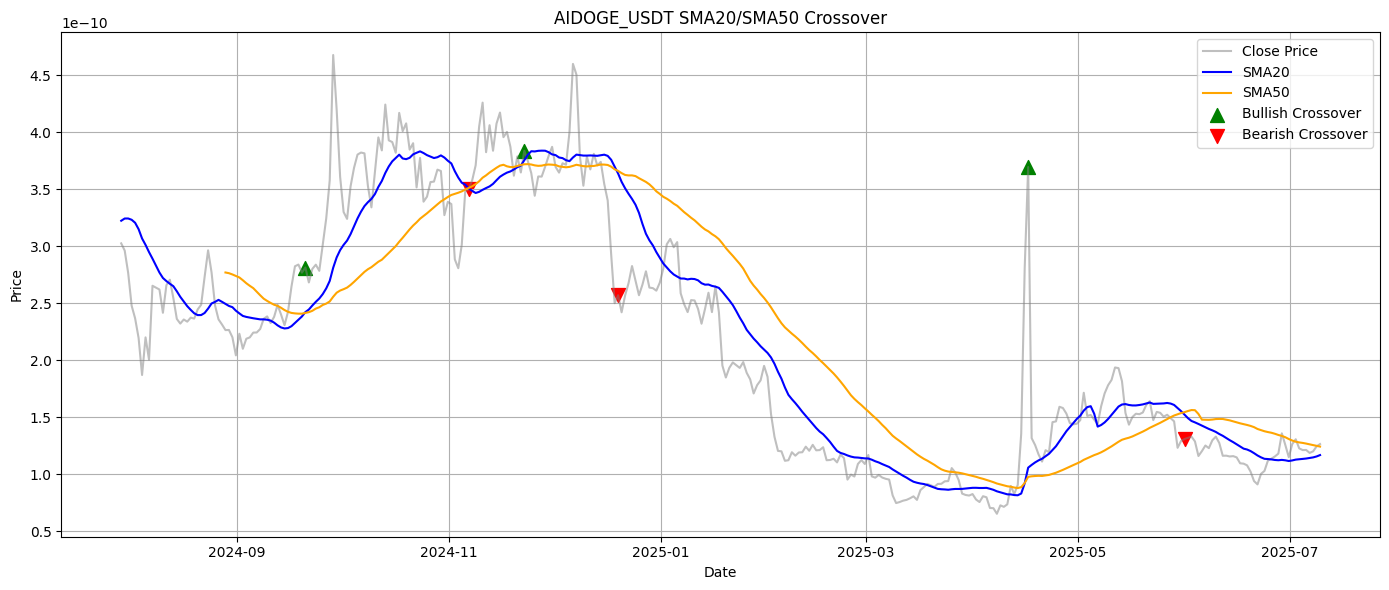

/var/folders/5s/msqhxw9x46gfs6_9m2x8qxch0000gn/T/ipykernel_93746/1249448013.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  sma_df = pd.read_sql(f"""
/var/folders/5s/msqhxw9x46gfs6_9m2x8qxch0000gn/T/ipykernel_93746/1249448013.py:33: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  close_df = pd.read_sql(f"""
/var/folders/5s/msqhxw9x46gfs6_9m2x8qxch0000gn/T/ipykernel_93746/1249448013.py:43: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  signal_df = pd.read_sql(f"""


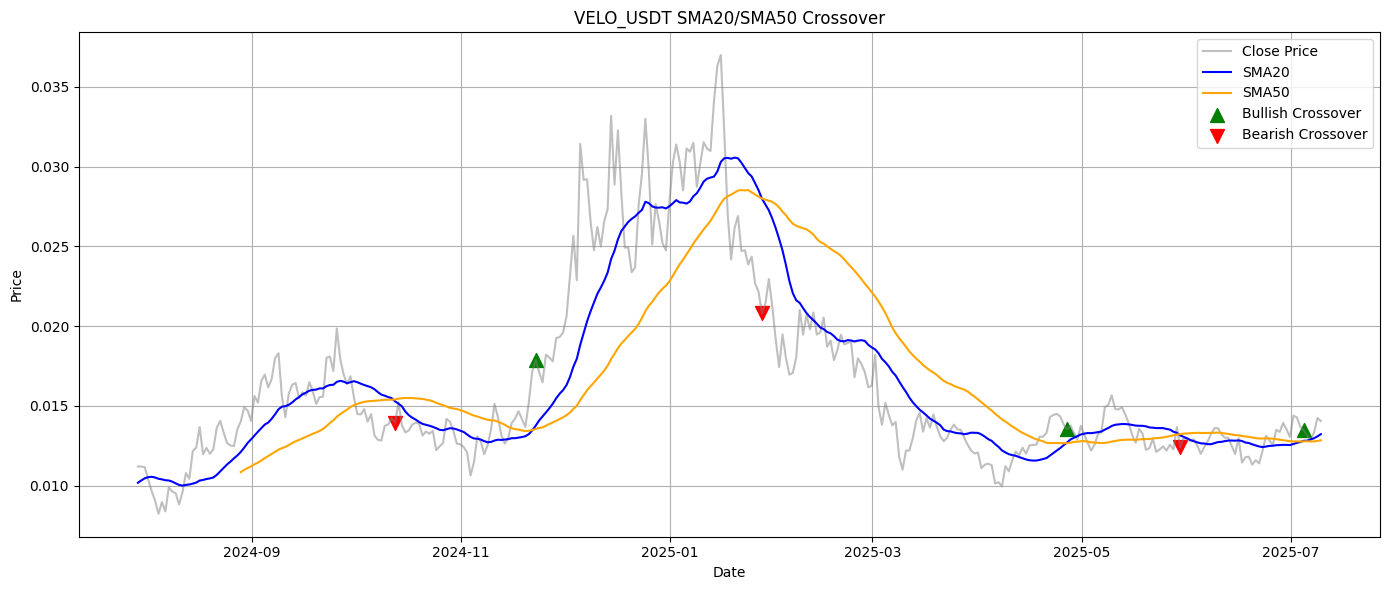

/var/folders/5s/msqhxw9x46gfs6_9m2x8qxch0000gn/T/ipykernel_93746/1249448013.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  sma_df = pd.read_sql(f"""
/var/folders/5s/msqhxw9x46gfs6_9m2x8qxch0000gn/T/ipykernel_93746/1249448013.py:33: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  close_df = pd.read_sql(f"""
/var/folders/5s/msqhxw9x46gfs6_9m2x8qxch0000gn/T/ipykernel_93746/1249448013.py:43: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  signal_df = pd.read_sql(f"""


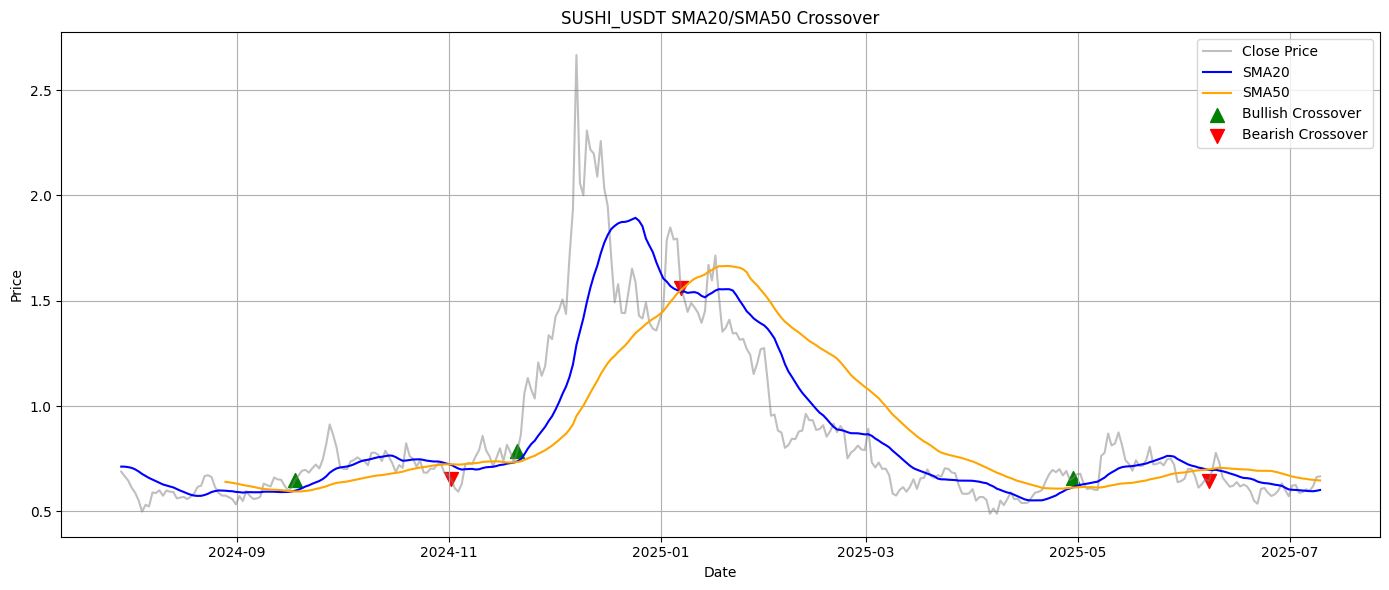

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import psycopg2

# Connect to PostgreSQL
conn = psycopg2.connect(
    dbname="crypto_index",
    user="postgres",
    password="postgres",  # update if needed
    host="localhost",
    port=5432
)

# Get list of all tokens with signals
token_df = pd.read_sql("SELECT DISTINCT token FROM sma_signals", conn)
token_list = token_df['token'].tolist()

# Plot for each token
for token in token_list:
    # Load SMA values in long format
    sma_df = pd.read_sql(f"""
        SELECT token, timestamp, sma_window, sma_value
        FROM sma_data
        WHERE token = '{token}' AND sma_window IN (20, 50)
    """, conn)

    # Pivot to wide format
    sma_wide = sma_df.pivot(index='timestamp', columns='sma_window', values='sma_value').reset_index()
    sma_wide.columns.name = None
    sma_wide = sma_wide.rename(columns={20: 'sma20', 50: 'sma50'})

    # Load closing price from ohlcv_data
    close_df = pd.read_sql(f"""
        SELECT timestamp, close
        FROM ohlcv_data
        WHERE token = '{token}'
    """, conn)

    # Merge SMA + close
    price_df = pd.merge(close_df, sma_wide, on='timestamp', how='inner')

    # Load signals
    signal_df = pd.read_sql(f"""
        SELECT timestamp, signal
        FROM sma_signals
        WHERE token = '{token}'
    """, conn)

    # Merge signals into price_df
    price_df['signal'] = None
    for _, row in signal_df.iterrows():
        price_df.loc[price_df['timestamp'] == row['timestamp'], 'signal'] = row['signal']

    # Plot
    plt.figure(figsize=(14, 6))
    plt.plot(price_df['timestamp'], price_df['close'], label='Close Price', alpha=0.5, color='gray')
    plt.plot(price_df['timestamp'], price_df['sma20'], label='SMA20', color='blue')
    plt.plot(price_df['timestamp'], price_df['sma50'], label='SMA50', color='orange')

    # Crossovers
    buy = price_df[price_df['signal'] == 'bullish_crossover']
    sell = price_df[price_df['signal'] == 'bearish_crossover']
    plt.scatter(buy['timestamp'], buy['close'], marker='^', color='green', label='Bullish Crossover', s=100)
    plt.scatter(sell['timestamp'], sell['close'], marker='v', color='red', label='Bearish Crossover', s=100)

    plt.title(f"{token} SMA20/SMA50 Crossover")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
